In [ ]:
! git clone https://github.com/ShivaniSingh2302/MyDatasets.git

fatal: destination path 'MyDatasets' already exists and is not an empty directory.


# Data Analysis Module

# Data Analysis

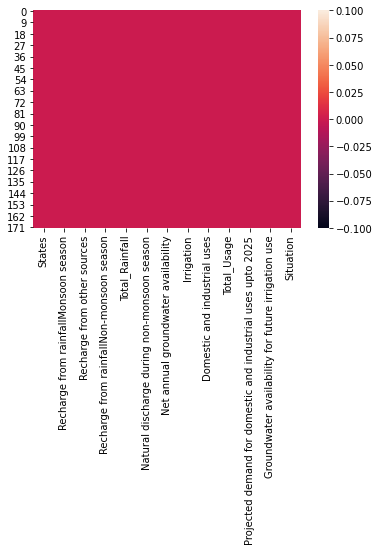

In [ ]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

data=pd.read_csv("/content/MyDatasets/data.csv")
#checking for null values
sb.heatmap(data.isnull())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 13 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   States                                                       172 non-null    object 
 1   Recharge from rainfallMonsoon season                         172 non-null    float64
 2   Recharge from other sources                                  172 non-null    float64
 3   Recharge from rainfallNon-monsoon season                     172 non-null    float64
 4   Total_Rainfall                                               172 non-null    float64
 5   Natural discharge during non-monsoon season                  172 non-null    float64
 6   Net annual groundwater availability                          172 non-null    float64
 7   Irrigation                                                   172 non-null    flo

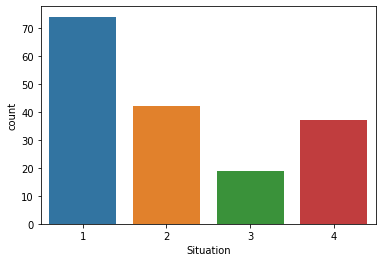

In [ ]:
#counting for target variable
sb.countplot(x='Situation',data=data)
#info about data
data.info()

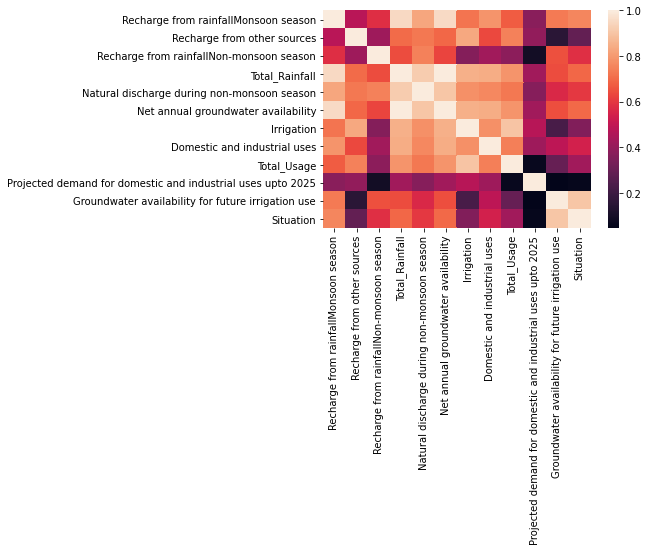

In [ ]:
import pandas as pd
import seaborn as sb

#correlation b/w variables
sb.heatmap(data.corr())

4   Total_Rainfall     
                                 
5   Natural discharge during non-monsoon season  

6   Net annual groundwater availability

9   Total_Usage  

10  Projected demand for domestic and industrial uses upto 2025


11  Groundwater availability for future irrigation 

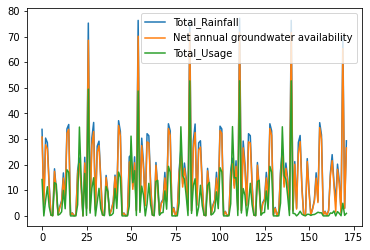

<Figure size 7200x360 with 0 Axes>

In [ ]:

data["Total_Rainfall"].plot(kind='line')
data["Net annual groundwater availability"].plot()
data["Total_Usage"].plot()
plt.legend(['Total_Rainfall','Net annual groundwater availability','Total_Usage'])
f=plt.figure()
f.set_figwidth(100)
f.set_figheight(5)
plt.show()


In [ ]:
#sb.pairplot(data, x_vars='Groundwater availability for future irrigation use', y_vars='Total_Usage', kind='scatter', diag_kind='hist',height=6.0)



# Algorithms

# Logistic regression

score =  0.7894736842105263


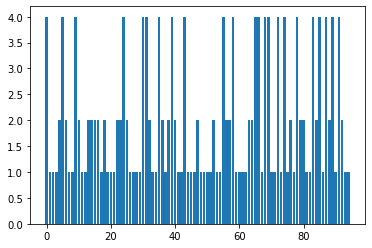

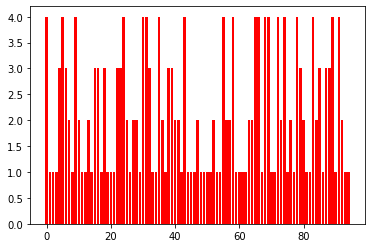

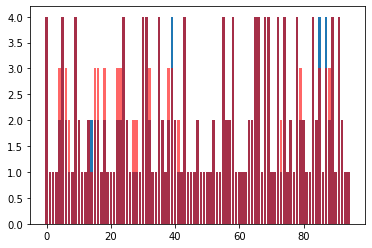

In [ ]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

data=pd.read_csv("/content/MyDatasets/data.csv")
data.head()
#sb.countplot(x='Situation',data=data,palette='bright')
#Extracting the required x values and y values from dataset
X = data.iloc[:, [4,5,6,9,10,11]]
Y = data.iloc[:,12]

#splitting the dataset into testing ansd training set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.55, random_state = 0)

#fitting the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 2)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
#print(classifier.score(X_test,Y_test))

from sklearn.metrics import accuracy_score
score =accuracy_score(Y_test,y_pred)
print("score = ", score)

x = [x for x in range(0,95)]

plt.bar(x, y_pred)
plt.show()

a=plt.bar(x, Y_test, color='red')
plt.show()

plt.bar(x, y_pred)
plt.bar(x,Y_test, color='red', alpha=0.6)
plt.show()




# Neural Network Regression
MLP Regressor

0.819637601067881
score =  0.7898550724637681
138     138


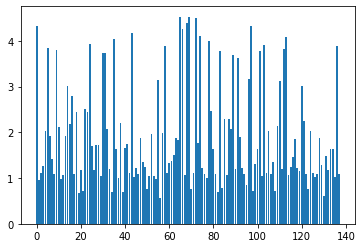

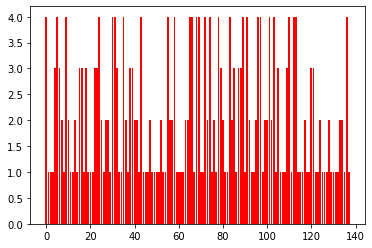

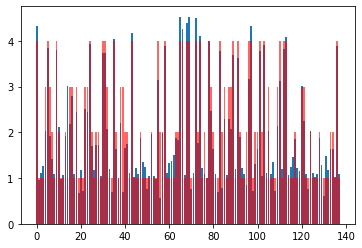

In [ ]:
import pandas as pd
import seaborn as sb

data=pd.read_csv("/content/MyDatasets/data.csv")
data.head()
X = data.iloc[:, [4,5,6,9,10,11]]
Y = data.iloc[:,12]

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.8
                                                    , random_state = 0)

from sklearn.neural_network import MLPRegressor
m2=MLPRegressor(max_iter=2000,random_state=1).fit(X_train,Y_train)
y_pred=m2.predict(X_test)
print(m2.score(X_test,Y_test))


from sklearn.metrics import accuracy_score
score =accuracy_score(Y_test,y_pred.round())
print("score = ", score)

print(y_pred.size,  "   ", Y_test.size)

x = [x for x in range(0,len(y_pred))]

plt.bar(x, y_pred)
plt.show()

plt.bar(x, Y_test, color='red')
plt.show()

plt.bar(x, y_pred)
plt.bar(x,Y_test, color='red', alpha=0.6)
plt.show()

# Support vector regressor

0.8950709836759342
score =  0.7933884297520661


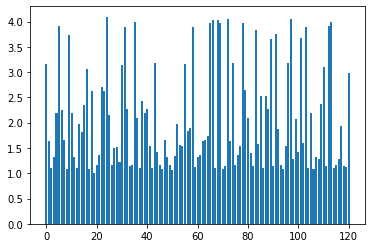

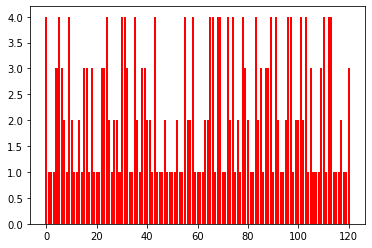

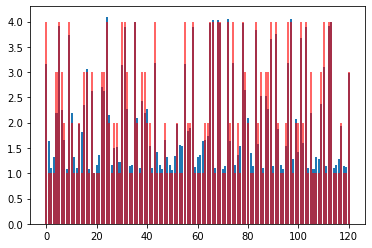

In [ ]:
from sklearn import svm

data=pd.read_csv("/content/MyDatasets/data.csv")
data.head()
X = data.iloc[:, [4,5,6,9,10,11]]
Y = data.iloc[:,12]

data['Situation']= pd.to_numeric(data['Situation'],errors='coerce')

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.7, random_state = 0)

m3=svm.SVR()
m3.fit(X_train,Y_train)
#r sqaure -- goodness of fit
print(m3.score(X_test,Y_test))

y_pred=m3.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred.round())

from sklearn.metrics import accuracy_score
score =accuracy_score(Y_test,y_pred.round())
print("score = ", score)

x = [x for x in range(0,len(y_pred))]

plt.bar(x, y_pred)
plt.show()

a=plt.bar(x, Y_test, color='red')
plt.show()

plt.bar(x, y_pred)
plt.bar(x,Y_test, color='red', alpha=0.6)
plt.show()

# StochasticGradientDescent Regressor

r sqaure= 0.8212122793858316
score =  0.6923076923076923


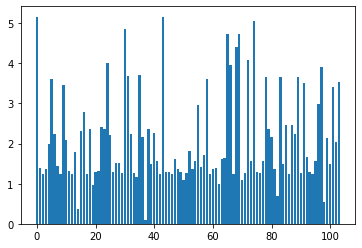

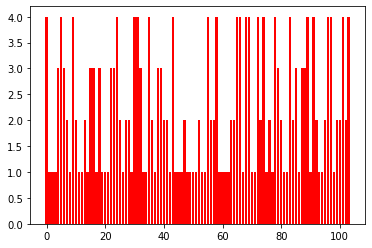

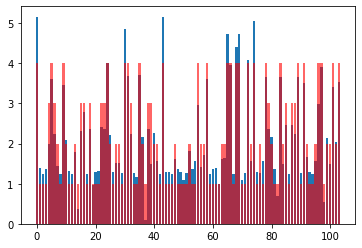

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

data=pd.read_csv("/content/MyDatasets/data.csv")
data.head()
X = data.iloc[:, [4,5,6,9,10,11]]
Y = data.iloc[:,12]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.6, random_state = 0)

reg = make_pipeline(StandardScaler(),SGDRegressor(max_iter=1000, tol=1e-3))
reg.fit(X_train, Y_train)

y_pred = reg.predict(X_test)

sc=reg.score(X_test,Y_test)
print("r sqaure=", sc)

from sklearn.metrics import accuracy_score
score =accuracy_score(Y_test,y_pred.round())
print("score = ", score)


x = [x for x in range(0,len(y_pred))]

plt.bar(x, y_pred)
plt.show()

a=plt.bar(x, Y_test, color='red')
plt.show()

plt.bar(x, y_pred)
plt.bar(x,Y_test, color='red', alpha=0.6)
plt.show()
